In [1]:
import csv
import re
import matplotlib
# import seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import ttest_ind
import scipy.stats as stats
import scipy.stats as ss
from matplotlib import style
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
import pandas as pd

# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
# from sklearn.linear_model import LogisticRegression
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler
# import seaborn

plt.style.context("seaborn-whitegrid")
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [141]:
#export
# demo to see convert this cell to script
TEST = 'test1'

In [148]:
! python notebook2script.py integration_and_copy_number_20190709.ipynb

Converted integration_and_copy_number_20190709.ipynb to exp/nb_integration_and_copy_number_20190709.py


In [2]:
master_table = '/projects/trans_scratch/validations/workspace/szong/Cervical/HTMCP_Cervical_Master_Patient_Table_V4_20190703.xlsx'
master = pd.read_excel(master_table, sep='\t', index_col='Patient')
master = master[master.Cohort == 'Discovery']
master = master[['HPV clade']]
master.head(2)


,HPV clade
Patient,
HTMCP-03-06-02001,A9
HTMCP-03-06-02002,A9


In [56]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/hpv_integration_events_extended_from_Emma_20190708.txt'
df = pd.read_csv(f, sep='\t')
pats = df.event.str.split('.', expand=True)[0]
df['patient'] = pats
df.head()
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/integration_events.txt'

# df.to_csv(of, sep='\t', index=False, header=False)

,chr,start,end,event,sample,length,closest.gene,tss.dist,patient
0,1,9155196,9158547,HTMCP-03-06-02328.HPV_68.1_9155196,HTMCP-03-06-02328.HPV_68,3351,SLC2A5,25309,HTMCP-03-06-02328
1,1,9155196,9155489,HTMCP-03-06-02326.HPV_68.1_9155196,HTMCP-03-06-02326.HPV_68,293,SLC2A5,25309,HTMCP-03-06-02326
2,1,17268994,17343229,HTMCP-03-06-02175.HPV_58.1_17268994,HTMCP-03-06-02175.HPV_58,74235,MFAP2,0,HTMCP-03-06-02175
3,1,19357257,19357257,HTMCP-03-06-02411.HPV_16.1_19357257,HTMCP-03-06-02411.HPV_16,0,IFFO2,74430,HTMCP-03-06-02411
4,1,22222804,22275462,HTMCP-03-06-02441.HPV_18.1_22222804,HTMCP-03-06-02441.HPV_18,52658,HSPG2,0,HTMCP-03-06-02441


In [ ]:
# %%bash
# cd /projects/trans_scratch/validations/workspace/szong/Cervical/cnv
# /projects/da_workspace/software/bedtools2/bin/bedtools intersect -a integration_events.txt.10kb.sorted -b gatk_118_seg_file.txt.sort -wa -wb  -e -f 0.5 -F 0.9 > integraton_intersect_cnv.txt

### an integration events cover many cnv segments, we may be better off to look into individual integration site

In [ ]:
dfz = dfy.groupby('pat_cnv')['pat_cnv'].count().sort_values(ascending=False)
(dfz > 1).sum()
dfz.shape

In [57]:
df[(df[12] == 'HTMCP-03-06-02428')&(df[6] == 'HTMCP-03-06-02428')]

KeyError: 12

### it may be a good idea to go back to my original integration file

In [50]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/118_patients_integration_details_merged_comparison_to_review_apv_removed_20190513.csv'
df = pd.read_csv(f)
df.head(2)
df.shape
df[df.virus=='HPV_18']

,patient,virus,comments,integration_status,107_results,101_results,integration_detected,source,DNA_Integration,DNA_human-breakpoint,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,HTMCP-03-06-02001,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_124,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HTMCP-03-06-02002,HPV_52,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_125,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(179, 61)

,patient,virus,comments,integration_status,107_results,101_results,integration_detected,source,DNA_Integration,DNA_human-breakpoint,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
3,HTMCP-03-06-02006,HPV_18,hpv18_false_positive,not_detected,not_detected,not_detected,NOT_INTEGRATED,HTMCP_129,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,HTMCP-03-06-02012,HPV_18,no_evidence_hpv18_integration,unintegrated,unintegrated,unintegrated,NOT_INTEGRATED,HTMCP_133,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,HTMCP-03-06-02020,HPV_18,hpv18_false_positive,not_detected,not_detected,not_detected,NOT_INTEGRATED,HTMCP_137,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,HTMCP-03-06-02047,HPV_18,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_148,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,HTMCP-03-06-02058,HPV_18,NaN,integrated,integrated,integrated,BOTH_INTEGRATED,HTMCP_151,YES,8_128323246;8_128319365;18_37408866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,HTMCP-03-06-02068,HPV_18,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_159,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,HTMCP-03-06-02074,HPV_18,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_164,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,HTMCP-03-06-02075,HPV_18,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_165,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,HTMCP-03-06-02076,HPV_18,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_166,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,HTMCP-03-06-02092,HPV_18,hpv18_false_positive,not_detected,not_detected,not_detected,NOT_INTEGRATED,HTMCP_172,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df[df.patient.isin(['HTMCP-03-06-02120', 'HTMCP-03-06-02204'])]

,patient,virus,comments,integration_status,107_results,101_results,integration_detected,source,DNA_Integration,DNA_human-breakpoint,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
53,HTMCP-03-06-02120,HPV_52,NaN,unintegrated,unintegrated,unintegrated,NOT_INTEGRATED,HTMCP_240,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,HTMCP-03-06-02120,HPV_58,NaN,integrated,integrated,integrated,DNA_INTEGRATED,HTMCP_240,YES,GL000220.1_159017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,HTMCP-03-06-02204,HPV_18,reviewed_confirmed_hpv18_integration,integrated,integrated,integrated,NOT_INTEGRATED,HTMCP_401,na,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.comments.unique()

array([nan, 'hpv18_false_positive', 'double_integration',
       'no_evidence_hpv18_integration', 'E6_7_expressed',
       'false_positive', 'reviewed_confirmed_hpv18_integration',
       'reviewed_confirmed_hpv16_integration', 'low_reads',
       'E6_7_expressed_super_high', 'E6_7_expressed_not_high',
       'only_1_read', 'reviewed_confirmed_hpv45_integration',
       'no_evidence_hpv97_integration'], dtype=object)

In [33]:
df.integration_status.unique()

array(['integrated', 'not_detected', 'unintegrated'], dtype=object)

In [34]:
df = df.query('integration_status == "integrated"')
df.head(2)
df.shape

,patient,virus,comments,integration_status,107_results,101_results,integration_detected,source,DNA_Integration,DNA_human-breakpoint,DNA_human-gene(s),library,RNA_Integration,RNA_human-breakpoint,RNA_human-gene(s)
0,HTMCP-03-06-02001,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_124,na,na,na,A37700,YES,3_189542968;3_189542598;3_189542597;3_18952631...,TP63
1,HTMCP-03-06-02002,HPV_52,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_125,na,na,na,A37701,YES,22_43168251;22_43165135;22_43163674;22_4316152...,intergenic


(113, 15)

In [35]:
df.comments.unique()
df.integration_status.unique()

array([nan, 'double_integration', 'reviewed_confirmed_hpv18_integration',
       'reviewed_confirmed_hpv16_integration',
       'E6_7_expressed_super_high', 'E6_7_expressed_not_high',
       'reviewed_confirmed_hpv45_integration'], dtype=object)

array(['integrated'], dtype=object)

In [37]:
pats_in = df.patient.unique().tolist()
len(pats_in)
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/118_patients.txt'
pats = pd.read_csv(f, header=None)[0].tolist()
len(pats)
pats_nonin = list(set(pats) - set(pats_in))
pats_nonin
df[df.patient.isin(pats_nonin)]

110

118

['HTMCP-03-06-02144',
 'HTMCP-03-06-02239',
 'HTMCP-03-06-02435',
 'HTMCP-03-06-02036',
 'HTMCP-03-06-02417',
 'HTMCP-03-06-02152',
 'HTMCP-03-06-02217',
 'HTMCP-03-06-02156']

,patient,virus,comments,integration_status,107_results,101_results,integration_detected,source,DNA_Integration,DNA_human-breakpoint,DNA_human-gene(s),library,RNA_Integration,RNA_human-breakpoint,RNA_human-gene(s)


In [38]:
set(pats_in) - set(pats_a)

{'HTMCP-03-06-02120', 'HTMCP-03-06-02204'}

In [7]:
df['breakpoints'] = df['DNA_human-breakpoint'] + ';' + df['RNA_human-breakpoint']
df.head(2)

,patient,virus,comments,integration_status,107_results,101_results,integration_detected,source,DNA_Integration,DNA_human-breakpoint,DNA_human-gene(s),library,RNA_Integration,RNA_human-breakpoint,RNA_human-gene(s),breakpoints
0,HTMCP-03-06-02001,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_124,na,na,na,A37700,YES,3_189542968;3_189542598;3_189542597;3_18952631...,TP63,na;3_189542968;3_189542598;3_189542597;3_18952...
1,HTMCP-03-06-02002,HPV_52,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_125,na,na,na,A37701,YES,22_43168251;22_43165135;22_43163674;22_4316152...,intergenic,na;22_43168251;22_43165135;22_43163674;22_4316...


In [8]:
s = df['breakpoints'].str.split(';', expand=True).stack()
idx = s.index.get_level_values(0)
dfn = df.loc[idx]
dfn['all_bpts'] = list(s)

dfn.shape

dfn = dfn[(dfn.all_bpts != 'na')&(dfn.all_bpts !='-')]
dfn = dfn[~dfn.all_bpts.str.startswith('G')]
dfn.shape

dfn.reset_index(drop=True, inplace=True)
dfn.head()

(1158, 17)

(1070, 17)

,patient,virus,comments,integration_status,107_results,101_results,integration_detected,source,DNA_Integration,DNA_human-breakpoint,DNA_human-gene(s),library,RNA_Integration,RNA_human-breakpoint,RNA_human-gene(s),breakpoints,all_bpts
0,HTMCP-03-06-02001,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_124,na,na,na,A37700,YES,3_189542968;3_189542598;3_189542597;3_18952631...,TP63,na;3_189542968;3_189542598;3_189542597;3_18952...,3_189542968
1,HTMCP-03-06-02001,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_124,na,na,na,A37700,YES,3_189542968;3_189542598;3_189542597;3_18952631...,TP63,na;3_189542968;3_189542598;3_189542597;3_18952...,3_189542598
2,HTMCP-03-06-02001,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_124,na,na,na,A37700,YES,3_189542968;3_189542598;3_189542597;3_18952631...,TP63,na;3_189542968;3_189542598;3_189542597;3_18952...,3_189542597
3,HTMCP-03-06-02001,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_124,na,na,na,A37700,YES,3_189542968;3_189542598;3_189542597;3_18952631...,TP63,na;3_189542968;3_189542598;3_189542597;3_18952...,3_189526317
4,HTMCP-03-06-02001,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_124,na,na,na,A37700,YES,3_189542968;3_189542598;3_189542597;3_18952631...,TP63,na;3_189542968;3_189542598;3_189542597;3_18952...,3_189526315


### now we extend 10k to the upstream and downstream of the breakpoints, merge if overlap

In [9]:
dfo = dfn[['patient', 'virus', 'all_bpts']]
dfo.head(2)

,patient,virus,all_bpts
0,HTMCP-03-06-02001,HPV_16,3_189542968
1,HTMCP-03-06-02001,HPV_16,3_189542598


In [10]:
dfo.shape
dfo.drop_duplicates(keep='first', inplace=True)
dfo.shape
# dfo[dfo.duplicated()]
# dfo[dfo.patient=='HTMCP-03-06-02042']
# dfo[dfo.all_bpts=='1_151029496']

(1070, 3)

/projects/da_workspace/software/miniconda/envs/dl37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1009, 3)

In [11]:
dfo[['chr', 'bkp']] = dfo.all_bpts.str.split('_', expand=True)

# dfo['bkp'] = dfo.bkp.astype(int)
dfo.loc[:, 'bkp'] = dfo.loc[:, 'bkp'].astype(int)
dfo.loc[:, 'start'] = dfo.loc[:, 'bkp'] -10000
dfo.loc[:, 'end'] = dfo.loc[:, 'bkp'] +10000
# dfo['start'] = dfo.bkp-10000
# dfo['end'] = dfo.bkp+10000

dfo.head(5)
dfo = dfo[['chr', 'start', 'end', 'patient', 'virus', 'all_bpts',  'bkp' ]]
dfo.head()

/projects/da_workspace/software/miniconda/envs/dl37/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/projects/da_workspace/software/miniconda/envs/dl37/lib/python3.7/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/projects/da_workspace/software/miniconda/envs/dl37/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a 

,patient,virus,all_bpts,chr,bkp,start,end
0,HTMCP-03-06-02001,HPV_16,3_189542968,3,189542968,189532968,189552968
1,HTMCP-03-06-02001,HPV_16,3_189542598,3,189542598,189532598,189552598
2,HTMCP-03-06-02001,HPV_16,3_189542597,3,189542597,189532597,189552597
3,HTMCP-03-06-02001,HPV_16,3_189526317,3,189526317,189516317,189536317
4,HTMCP-03-06-02001,HPV_16,3_189526315,3,189526315,189516315,189536315


,chr,start,end,patient,virus,all_bpts,bkp
0,3,189532968,189552968,HTMCP-03-06-02001,HPV_16,3_189542968,189542968
1,3,189532598,189552598,HTMCP-03-06-02001,HPV_16,3_189542598,189542598
2,3,189532597,189552597,HTMCP-03-06-02001,HPV_16,3_189542597,189542597
3,3,189516317,189536317,HTMCP-03-06-02001,HPV_16,3_189526317,189526317
4,3,189516315,189536315,HTMCP-03-06-02001,HPV_16,3_189526315,189526315


In [12]:
dfo['chr'] = dfo['chr'].replace('X', 23).astype(int)

In [13]:
dfo.sort_values(['chr', 'start', 'end'], inplace=True)

In [14]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/integration_site_10kb.tsv'
dfo.to_csv(of, index=False, header=None, sep='\t')


### merge overlap integrations if patients are different

In [15]:
%%bash
cd /projects/trans_scratch/validations/workspace/szong/Cervical/integration
while read i;do grep $i integration_site_10kb.tsv> aaa.txt;/projects/da_workspace/software/bedtools2/bin/bedtools merge -i aaa.txt -c 4,5 -o distinct,distinct;done < integration_patients.txt|sort -k1,1n -k2,2n -k3,3n > integration_site_10kb_merge.tsv



In [16]:
%%bash
cd /projects/trans_scratch/validations/workspace/szong/Cervical/cnv
/projects/da_workspace/software/bedtools2/bin/bedtools intersect -a /projects/trans_scratch/validations/workspace/szong/Cervical/integration/integration_site_10kb_merge.tsv -b gatk_118_seg_file.txt.sort -wa -wb  -e -f 0.5 -F 0.9 > integraton_intersect_cnv.txt

In [17]:
# f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/integraton_intersect_cnv.txt'
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/integraton_intersect_cnv.txt'

df = pd.read_csv(f, sep='\t', header=None)
df.head()

df['seg_length'] = df[7] - df[6]
df['int_length'] = df[2] -df[1] -20000

df.shape

df[0] = df[0].astype(str)
df[1] = df[1].astype(str)

df['header'] = df[0] + '_' + df[1] +'_' + df[3] + '_' + df[4]


df.head()

dfy = df[df[3] == df[9]][[3, 8, 9, 'int_length', 'seg_length']]
dfy.columns = ['pat', 'cnv', 'pat_cnv', 'int_length','seg_length']
dfy.head(2)
dfy.shape

df.loc[dfy.index,:].head(2)

,0,1,2,3,4,5,6,7,8,9
0,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,9098001,9391000,-0.102177,HTMCP-03-06-02013
1,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,8395001,11041000,0.051498,HTMCP-03-06-02174
2,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,8717001,11135000,0.192112,HTMCP-03-06-02259
3,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,8758001,9724000,-0.716194,HTMCP-03-06-02180
4,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,8986001,10254000,0.048797,HTMCP-03-06-02266


(40822, 12)

,0,1,2,3,4,5,6,7,8,9,seg_length,int_length,header
0,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,9098001,9391000,-0.102177,HTMCP-03-06-02013,292999,291,1_9145197_HTMCP-03-06-02326_HPV_68
1,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,8395001,11041000,0.051498,HTMCP-03-06-02174,2645999,291,1_9145197_HTMCP-03-06-02326_HPV_68
2,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,8717001,11135000,0.192112,HTMCP-03-06-02259,2417999,291,1_9145197_HTMCP-03-06-02326_HPV_68
3,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,8758001,9724000,-0.716194,HTMCP-03-06-02180,965999,291,1_9145197_HTMCP-03-06-02326_HPV_68
4,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,8986001,10254000,0.048797,HTMCP-03-06-02266,1267999,291,1_9145197_HTMCP-03-06-02326_HPV_68


,pat,cnv,pat_cnv,int_length,seg_length
89,HTMCP-03-06-02326,0.309997,HTMCP-03-06-02326,291,2326999
225,HTMCP-03-06-02328,0.611302,HTMCP-03-06-02328,3349,1517999


(338, 5)

,0,1,2,3,4,5,6,7,8,9,seg_length,int_length,header
89,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,6833001,9160000,0.309997,HTMCP-03-06-02326,2326999,291,1_9145197_HTMCP-03-06-02326_HPV_68
225,1,9145197,9168546,HTMCP-03-06-02328,HPV_68,1,7942001,9460000,0.611302,HTMCP-03-06-02328,1517999,3349,1_9145197_HTMCP-03-06-02328_HPV_68


In [18]:
dfy.shape
dfy.head()

(338, 5)

,pat,cnv,pat_cnv,int_length,seg_length
89,HTMCP-03-06-02326,0.309997,HTMCP-03-06-02326,291,2326999
225,HTMCP-03-06-02328,0.611302,HTMCP-03-06-02328,3349,1517999
370,HTMCP-03-06-02411,-0.426462,HTMCP-03-06-02411,0,50999
517,HTMCP-03-06-02441,-0.441961,HTMCP-03-06-02441,7533,234999
605,HTMCP-03-06-02441,2.263691,HTMCP-03-06-02441,11814,46999


### now it is much better only about 7 merged integration events intersect with >1 cnvs

In [ ]:
dfq = df[df[3] == df[9]]
dfq[:2]
dfq.shape
(dfq.groupby([0,1,2,3])[9].count().sort_values(ascending=False)>1).sum()
dfq[dfq[1] == '128728871']

In [ ]:
dfz = dfy.groupby('pat_cnv')['pat_cnv'].count().sort_values(ascending=False)
(dfz > 1).sum()
dfz.shape
df[(df[12] == 'HTMCP-03-06-02428')&(df[6] == 'HTMCP-03-06-02428')]

### we only care about integration site resulted in copy number changes

In [48]:
dfy[(dfy.cnv >0.1)|(dfy.cnv<-0.1)].shape
dfy.shape
259/338
# 77% of these integration sites have a change number change, either gain or loss
dfy = dfy[(dfy.cnv >0.1)|(dfy.cnv<-0.1)]

(259, 5)

(338, 5)

0.7662721893491125

(259, 5)

Text(0.5, 1.0, 'cn segment length distribution')

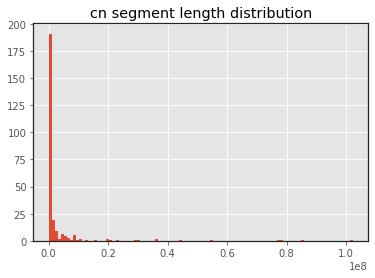

In [50]:
dfy.shape
dfy.seg_length.hist(bins=100)
plt.title('cn segment length distribution')
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/integration_cn_seg_length_distribution.pdf'
plt.savefig(of, dpi=200, bbox_inches='tight')

Text(0.5, 1.0, 'integration site(s) length distribution')

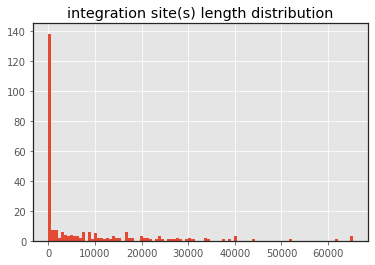

In [51]:
dfy.int_length.hist(bins=100)
plt.title('integration site(s) length distribution')
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/integration_sites_length_distribution.pdf'
plt.savefig(of, dpi=200, bbox_inches='tight')

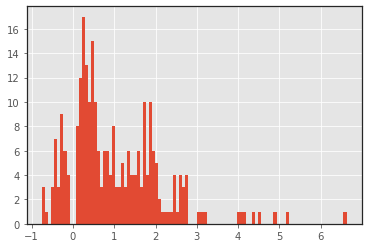

In [53]:
dfy.cnv.hist(bins=100)

In [57]:
dfy.shape
dfy[dfy.seg_length <10000000].shape
dfy[dfy.seg_length-dfy.int_length <500000].shape
241/259.0
173/259.0

(259, 5)

(241, 5)

(173, 5)

0.9305019305019305

0.667953667953668

In [108]:
# dfn = dfm.copy()
dfn.head()
dfn.shape

,cn_mean,events,cn,diff
23238,-0.024965,2_159143019_HTMCP-03-06-02427_HPV_18,-0.742808,-0.717843
20170,0.012019,22_31980119_HTMCP-03-06-02427_HPV_18,-0.703105,-0.715124
32989,-0.164644,4_87634435_HTMCP-03-06-02214_HPV_16,-0.731930,-0.567286
27896,0.503921,3_189453297_HTMCP-03-06-02170_HPV_45,0.000000,-0.503921
18169,0.058071,1_22212805_HTMCP-03-06-02441_HPV_18,-0.441961,-0.500032


(361, 4)

In [110]:
dfn['pat'] = dfn.events.apply(lambda x: x.split('_')[2])

In [111]:
dfn.head(2)

,cn_mean,events,cn,diff,pat
23238,-0.024965,2_159143019_HTMCP-03-06-02427_HPV_18,-0.742808,-0.717843,HTMCP-03-06-02427
20170,0.012019,22_31980119_HTMCP-03-06-02427_HPV_18,-0.703105,-0.715124,HTMCP-03-06-02427


In [139]:
dff = dfn.merge(master, left_on='pat', right_index=True)
# dff['abscn'] = dff.cn.apply(lambda x: 2**(1+x))
# dff['abscn_mean'] = dff.cn_mean.apply(lambda x: 2**(1+x))
dff['fold_chg'] = dff['diff']/dff.cn_mean
dff.head(2)

,cn_mean,events,cn,diff,pat,HPV clade,fold_chg
23238,-0.024965,2_159143019_HTMCP-03-06-02427_HPV_18,-0.742808,-0.717843,HTMCP-03-06-02427,A7,28.753481
20170,0.012019,22_31980119_HTMCP-03-06-02427_HPV_18,-0.703105,-0.715124,HTMCP-03-06-02427,A7,-59.501480


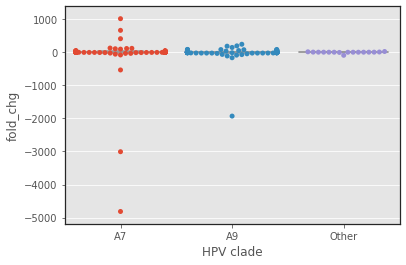

In [140]:
f, ax = plt.subplots()
sns.boxplot(x='HPV clade', y='fold_chg', data=dff, color='white',  fliersize=0)
sns.swarmplot(x='HPV clade', y='fold_chg', data=dff)
# ax.set_yscale('log')

In [109]:
# dfm = pd.merge(dfy, master, left_on='pat', right_index=True)
# dfm.head(2)
# dfm.shape

,pat,cnv,pat_cnv,int_length,seg_length,HPV clade
89,HTMCP-03-06-02326,0.309997,HTMCP-03-06-02326,291,2326999,A7
3856,HTMCP-03-06-02326,0.741100,HTMCP-03-06-02326,0,1260999,A7


(259, 6)

In [114]:
# dfm.merge(dfn, left_on='pat', right_on='pat', how='right' )

,pat,cnv,pat_cnv,int_length,seg_length,HPV clade,cn_mean,events,cn,diff
0,HTMCP-03-06-02326,0.309997,HTMCP-03-06-02326,291.0,2326999.0,A7,-0.105543,5_179608831_HTMCP-03-06-02326_HPV_45,-0.101225,0.004318
1,HTMCP-03-06-02326,0.741100,HTMCP-03-06-02326,0.0,1260999.0,A7,-0.105543,5_179608831_HTMCP-03-06-02326_HPV_45,-0.101225,0.004318
2,HTMCP-03-06-02326,-0.101225,HTMCP-03-06-02326,0.0,30538999.0,A7,-0.105543,5_179608831_HTMCP-03-06-02326_HPV_45,-0.101225,0.004318
3,HTMCP-03-06-02326,1.369556,HTMCP-03-06-02326,9225.0,128999.0,A7,-0.105543,5_179608831_HTMCP-03-06-02326_HPV_45,-0.101225,0.004318
4,HTMCP-03-06-02326,0.309997,HTMCP-03-06-02326,291.0,2326999.0,A7,0.052198,1_9145197_HTMCP-03-06-02326_HPV_68,0.309997,0.257799
5,HTMCP-03-06-02326,0.741100,HTMCP-03-06-02326,0.0,1260999.0,A7,0.052198,1_9145197_HTMCP-03-06-02326_HPV_68,0.309997,0.257799
6,HTMCP-03-06-02326,-0.101225,HTMCP-03-06-02326,0.0,30538999.0,A7,0.052198,1_9145197_HTMCP-03-06-02326_HPV_68,0.309997,0.257799
7,HTMCP-03-06-02326,1.369556,HTMCP-03-06-02326,9225.0,128999.0,A7,0.052198,1_9145197_HTMCP-03-06-02326_HPV_68,0.309997,0.257799
8,HTMCP-03-06-02326,0.309997,HTMCP-03-06-02326,291.0,2326999.0,A7,0.085734,2_42438195_HTMCP-03-06-02326_HPV_45,0.741100,0.655366
9,HTMCP-03-06-02326,0.741100,HTMCP-03-06-02326,0.0,1260999.0,A7,0.085734,2_42438195_HTMCP-03-06-02326_HPV_45,0.741100,0.655366


,pat,cnv,pat_cnv,int_length,seg_length,HPV clade
89,HTMCP-03-06-02326,0.309997,HTMCP-03-06-02326,291,2326999,A7
3856,HTMCP-03-06-02326,0.741100,HTMCP-03-06-02326,0,1260999,A7


Text(0.5, 1.0, 'copy gain at integration sites A9 vs A7')

Ttest_indResult(statistic=-1.3479490738954116, pvalue=0.17911332291806936)

Ttest_indResult(statistic=-1.0544409926286524, pvalue=0.2934974133408149)

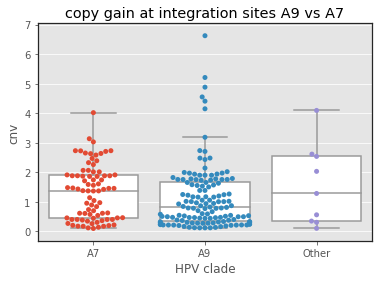

In [66]:
dfp = dfm[dfm.cnv>0.1]
sns.boxplot(x='HPV clade', y='cnv', data=dfp, color='white',  fliersize=0)
sns.swarmplot(x='HPV clade', y='cnv', data=dfp)
plt.title('copy gain at integration sites A9 vs A7')
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/copy_gain_at_integration_sites_A7_vs_A9.pdf'
# plt.savefig(of, dpi=200, bbox_inches='tight')

# A9 = dfp[dfp['HPV clade'] == 'A9']['cnv']
# A7 = dfp[dfp['HPV clade'] == 'A7']['cnv']
# other = dfp[dfp['HPV clade'] == 'Other']['cnv']
# stats.ttest_ind(A9, A7)
# stats.ttest_ind(A9, other)

Ttest_indResult(statistic=0.07415420072272606, pvalue=0.9413222589665815)

In [ ]:
dfy.seg_length.min()

Text(0.5, 0, 'integration_site(s)_length')

Text(0, 0.5, 'cn_segment_length')

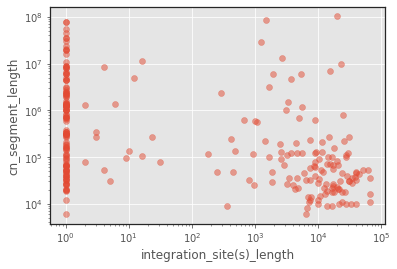

In [54]:
plt.scatter(dfy.int_length+1, dfy.seg_length, alpha=0.5) 
plt.xscale('log')
plt.yscale('log')
# xlim(0, 80000)
# ylim(5000, 1e9)
plt.xlabel('integration_site(s)_length')
plt.ylabel('cn_segment_length')
# plt.xlabel('seg length kb')
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/correlation_integration_site_length_cn_seg_length.pdf'
plt.savefig(of, dpi=200, bbox_inches='tight')

(55, 5)

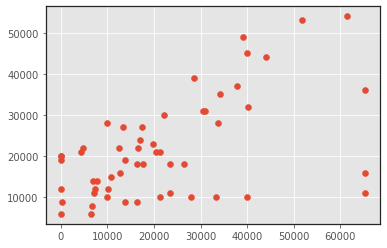

In [30]:
dfx = dfy[dfy.int_length > dfy.seg_length-20000]
dfx.shape
plt.scatter(dfx.int_length, dfx.seg_length)

### boxplot of copy number ratio for all patient for all integration site

In [73]:
df.head(2)
df.shape

,0,1,2,3,4,5,6,7,8,9,seg_length,int_length,header
0,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,9098001,9391000,-0.102177,HTMCP-03-06-02013,292999,291,1_9145197_HTMCP-03-06-02326_HPV_68
1,1,9145197,9165488,HTMCP-03-06-02326,HPV_68,1,8395001,11041000,0.051498,HTMCP-03-06-02174,2645999,291,1_9145197_HTMCP-03-06-02326_HPV_68


(40822, 13)

In [71]:
dfp = pd.pivot_table(df, values=8, index='header', columns=9, fill_value=0).T.reset_index()
# dfp.drop('header', axis=1)
dfp.head(2)
dfp.shape

header,9,10_114074136_HTMCP-03-06-02209_HPV_16,10_114162408_HTMCP-03-06-02209_HPV_16,10_13316755_HTMCP-03-06-02175_HPV_58,10_13379178_HTMCP-03-06-02175_HPV_58,10_135514184_HTMCP-03-06-02267_HPV_18,10_4367765_HTMCP-03-06-02075_HPV_18,10_4698336_HTMCP-03-06-02377_HPV_45,10_88639321_HTMCP-03-06-02175_HPV_58,10_99053964_HTMCP-03-06-02210_HPV_16,...,9_36331607_HTMCP-03-06-02179_HPV_18,9_42144228_HTMCP-03-06-02175_HPV_58,9_45507354_HTMCP-03-06-02175_HPV_58,9_45869500_HTMCP-03-06-02175_HPV_58,9_45909855_HTMCP-03-06-02175_HPV_58,9_68196893_HTMCP-03-06-02175_HPV_58,9_74048408_HTMCP-03-06-02396_HPV_18,9_76014931_HTMCP-03-06-02175_HPV_58,9_85667563_HTMCP-03-06-02215_HPV_16,9_97562523_HTMCP-03-06-02333_HPV_16
0,HTMCP-03-06-02001,-0.001637,-0.001637,-0.008649,-0.008649,-0.070935,-0.008649,-0.008649,0.003638,0.003638,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000426,0.000426,0.000426,0.000426
1,HTMCP-03-06-02002,-0.024661,-0.024661,-0.084479,-0.084479,-0.024661,-0.018158,-0.018158,-0.020975,-0.020975,...,0.471261,0.0,0.0,0.0,0.0,0.0,0.405973,0.502504,0.374129,0.425855


(118, 362)

### get copy number for the patients with integration

In [74]:
dfp1 = dfp.set_index(9, drop=True)
dfp1.head(2)
cnames = dfp1.columns
rnames = [str(x).split('_')[2] for x in cnames]
for r, c in list(zip(rnames,cnames )):
    dfp1.loc['int_cn', c] = dfp1.loc[r, c]
    dfp1.loc['int_pat', c] = r
dfp1.head()
dfp1.shape

header,10_114074136_HTMCP-03-06-02209_HPV_16,10_114162408_HTMCP-03-06-02209_HPV_16,10_13316755_HTMCP-03-06-02175_HPV_58,10_13379178_HTMCP-03-06-02175_HPV_58,10_135514184_HTMCP-03-06-02267_HPV_18,10_4367765_HTMCP-03-06-02075_HPV_18,10_4698336_HTMCP-03-06-02377_HPV_45,10_88639321_HTMCP-03-06-02175_HPV_58,10_99053964_HTMCP-03-06-02210_HPV_16,11_123428967_HTMCP-03-06-02109_HPV_16,...,9_36331607_HTMCP-03-06-02179_HPV_18,9_42144228_HTMCP-03-06-02175_HPV_58,9_45507354_HTMCP-03-06-02175_HPV_58,9_45869500_HTMCP-03-06-02175_HPV_58,9_45909855_HTMCP-03-06-02175_HPV_58,9_68196893_HTMCP-03-06-02175_HPV_58,9_74048408_HTMCP-03-06-02396_HPV_18,9_76014931_HTMCP-03-06-02175_HPV_58,9_85667563_HTMCP-03-06-02215_HPV_16,9_97562523_HTMCP-03-06-02333_HPV_16
9,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,-0.001637,-0.001637,-0.008649,-0.008649,-0.070935,-0.008649,-0.008649,0.003638,0.003638,-0.006639,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000426,0.000426,0.000426,0.000426
HTMCP-03-06-02002,-0.024661,-0.024661,-0.084479,-0.084479,-0.024661,-0.018158,-0.018158,-0.020975,-0.020975,-0.024863,...,0.471261,0.0,0.0,0.0,0.0,0.0,0.405973,0.502504,0.374129,0.425855


header,10_114074136_HTMCP-03-06-02209_HPV_16,10_114162408_HTMCP-03-06-02209_HPV_16,10_13316755_HTMCP-03-06-02175_HPV_58,10_13379178_HTMCP-03-06-02175_HPV_58,10_135514184_HTMCP-03-06-02267_HPV_18,10_4367765_HTMCP-03-06-02075_HPV_18,10_4698336_HTMCP-03-06-02377_HPV_45,10_88639321_HTMCP-03-06-02175_HPV_58,10_99053964_HTMCP-03-06-02210_HPV_16,11_123428967_HTMCP-03-06-02109_HPV_16,...,9_36331607_HTMCP-03-06-02179_HPV_18,9_42144228_HTMCP-03-06-02175_HPV_58,9_45507354_HTMCP-03-06-02175_HPV_58,9_45869500_HTMCP-03-06-02175_HPV_58,9_45909855_HTMCP-03-06-02175_HPV_58,9_68196893_HTMCP-03-06-02175_HPV_58,9_74048408_HTMCP-03-06-02396_HPV_18,9_76014931_HTMCP-03-06-02175_HPV_58,9_85667563_HTMCP-03-06-02215_HPV_16,9_97562523_HTMCP-03-06-02333_HPV_16
9,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,-0.001637,-0.001637,-0.008649,-0.008649,-0.070935,-0.008649,-0.008649,0.003638,0.003638,-0.006639,...,0,0,0,0,0,0,0.000426,0.000426,0.000426,0.000426
HTMCP-03-06-02002,-0.024661,-0.024661,-0.084479,-0.084479,-0.024661,-0.018158,-0.018158,-0.020975,-0.020975,-0.024863,...,0.471261,0,0,0,0,0,0.405973,0.502504,0.374129,0.425855
HTMCP-03-06-02003,-0.452718,-0.452718,-0.463366,-0.463366,0,-0.467726,-0.443602,-0.449213,-0.459789,-0.810778,...,0.244508,0.244508,0,0,0,0,0.238672,0.238672,0.238672,0.238672
HTMCP-03-06-02006,-0.522743,-0.522743,0.025373,0.025373,0.033757,0.025373,0.025373,-0.537919,-0.5558,0.016359,...,0.059552,0.059552,0.059552,0.059552,0.059552,0,0.043521,0.043521,0.043521,0.271822
HTMCP-03-06-02008,-0.005645,-0.005645,-0.017572,-0.017572,-0.005645,-0.017572,-0.017572,-0.005645,-0.005645,-0.009046,...,-0.013976,0,0,0,0,0,-0.008331,-0.008331,-0.008331,-0.008331


(120, 361)

In [75]:
dfp1.tail(2)

header,10_114074136_HTMCP-03-06-02209_HPV_16,10_114162408_HTMCP-03-06-02209_HPV_16,10_13316755_HTMCP-03-06-02175_HPV_58,10_13379178_HTMCP-03-06-02175_HPV_58,10_135514184_HTMCP-03-06-02267_HPV_18,10_4367765_HTMCP-03-06-02075_HPV_18,10_4698336_HTMCP-03-06-02377_HPV_45,10_88639321_HTMCP-03-06-02175_HPV_58,10_99053964_HTMCP-03-06-02210_HPV_16,11_123428967_HTMCP-03-06-02109_HPV_16,...,9_36331607_HTMCP-03-06-02179_HPV_18,9_42144228_HTMCP-03-06-02175_HPV_58,9_45507354_HTMCP-03-06-02175_HPV_58,9_45869500_HTMCP-03-06-02175_HPV_58,9_45909855_HTMCP-03-06-02175_HPV_58,9_68196893_HTMCP-03-06-02175_HPV_58,9_74048408_HTMCP-03-06-02396_HPV_18,9_76014931_HTMCP-03-06-02175_HPV_58,9_85667563_HTMCP-03-06-02215_HPV_16,9_97562523_HTMCP-03-06-02333_HPV_16
9,,,,,,,,,,,,,,,,,,,,,
int_cn,1.16291,0.786474,1.24431,0.329426,0,0.272387,0.726287,-0.326872,1.38887,0.814621,...,0.350477,-0.28851,0,0,0,0,-0.410888,0.092823,0.869596,0.277967
int_pat,HTMCP-03-06-02209,HTMCP-03-06-02209,HTMCP-03-06-02175,HTMCP-03-06-02175,HTMCP-03-06-02267,HTMCP-03-06-02075,HTMCP-03-06-02377,HTMCP-03-06-02175,HTMCP-03-06-02210,HTMCP-03-06-02109,...,HTMCP-03-06-02179,HTMCP-03-06-02175,HTMCP-03-06-02175,HTMCP-03-06-02175,HTMCP-03-06-02175,HTMCP-03-06-02175,HTMCP-03-06-02396,HTMCP-03-06-02175,HTMCP-03-06-02215,HTMCP-03-06-02333


In [76]:
dfp_stats = dfp.describe(percentiles=[0.1,  0.25, 0.5,  0.75, 0.9 ])
dfp_stats

header,10_114074136_HTMCP-03-06-02209_HPV_16,10_114162408_HTMCP-03-06-02209_HPV_16,10_13316755_HTMCP-03-06-02175_HPV_58,10_13379178_HTMCP-03-06-02175_HPV_58,10_135514184_HTMCP-03-06-02267_HPV_18,10_4367765_HTMCP-03-06-02075_HPV_18,10_4698336_HTMCP-03-06-02377_HPV_45,10_88639321_HTMCP-03-06-02175_HPV_58,10_99053964_HTMCP-03-06-02210_HPV_16,11_123428967_HTMCP-03-06-02109_HPV_16,...,9_36331607_HTMCP-03-06-02179_HPV_18,9_42144228_HTMCP-03-06-02175_HPV_58,9_45507354_HTMCP-03-06-02175_HPV_58,9_45869500_HTMCP-03-06-02175_HPV_58,9_45909855_HTMCP-03-06-02175_HPV_58,9_68196893_HTMCP-03-06-02175_HPV_58,9_74048408_HTMCP-03-06-02396_HPV_18,9_76014931_HTMCP-03-06-02175_HPV_58,9_85667563_HTMCP-03-06-02215_HPV_16,9_97562523_HTMCP-03-06-02333_HPV_16
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,-0.084167,-0.087390,-0.079860,-0.087614,-0.039922,-0.088495,-0.073781,-0.124678,-0.089158,-0.278332,...,0.030983,0.040254,0.000141,0.000141,0.000141,0.001032,0.062661,0.076171,0.059732,0.071927
std,0.234875,0.219500,0.226144,0.193715,0.154756,0.200566,0.216195,0.289254,0.251972,0.315302,...,0.203849,0.141228,0.053315,0.053315,0.053315,0.011205,0.189762,0.189210,0.205374,0.215538
min,-0.809855,-0.809855,-0.667084,-0.667084,-0.652979,-0.685475,-0.655514,-2.305778,-0.797320,-0.930837,...,-0.522775,-0.513856,-0.268043,-0.268043,-0.268043,0.000000,-0.488989,-0.475956,-0.491348,-0.511987
10%,-0.341074,-0.341074,-0.328729,-0.328729,-0.185643,-0.362478,-0.345379,-0.470520,-0.393596,-0.736118,...,-0.227927,-0.062002,0.000000,0.000000,0.000000,0.000000,-0.127473,-0.108973,-0.120717,-0.127485
25%,-0.150091,-0.150091,-0.195370,-0.195370,-0.076510,-0.176826,-0.156508,-0.181829,-0.139206,-0.523983,...,-0.060301,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016820,-0.013131,-0.032086,-0.022192
50%,-0.033442,-0.033442,-0.033576,-0.033576,-0.017440,-0.030546,-0.028328,-0.040756,-0.027203,-0.185275,...,0.009550,0.000000,0.000000,0.000000,0.000000,0.000000,0.015719,0.024214,0.015138,0.022073
75%,0.005743,0.004314,0.001929,0.001929,0.000000,0.009122,0.011883,0.003769,0.007525,-0.025844,...,0.150533,0.054658,0.000000,0.000000,0.000000,0.000000,0.164192,0.168728,0.138284,0.169690
90%,0.087371,0.087371,0.085935,0.085935,0.060915,0.082269,0.107705,0.054953,0.082404,0.031206,...,0.283100,0.233579,0.000000,0.000000,0.000000,0.000000,0.347288,0.339452,0.339351,0.378233
max,1.162908,0.786474,1.244306,0.403231,0.705033,0.450399,0.726287,0.274390,1.388868,0.814621,...,0.512897,0.462559,0.257009,0.257009,0.257009,0.121721,0.584732,0.661645,0.869596,0.719401


In [77]:
dfp_stats = pd.concat([dfp_stats, dfp1.loc[['int_cn', 'int_pat'], :]])

In [78]:
dfp_stats

header,10_114074136_HTMCP-03-06-02209_HPV_16,10_114162408_HTMCP-03-06-02209_HPV_16,10_13316755_HTMCP-03-06-02175_HPV_58,10_13379178_HTMCP-03-06-02175_HPV_58,10_135514184_HTMCP-03-06-02267_HPV_18,10_4367765_HTMCP-03-06-02075_HPV_18,10_4698336_HTMCP-03-06-02377_HPV_45,10_88639321_HTMCP-03-06-02175_HPV_58,10_99053964_HTMCP-03-06-02210_HPV_16,11_123428967_HTMCP-03-06-02109_HPV_16,...,9_36331607_HTMCP-03-06-02179_HPV_18,9_42144228_HTMCP-03-06-02175_HPV_58,9_45507354_HTMCP-03-06-02175_HPV_58,9_45869500_HTMCP-03-06-02175_HPV_58,9_45909855_HTMCP-03-06-02175_HPV_58,9_68196893_HTMCP-03-06-02175_HPV_58,9_74048408_HTMCP-03-06-02396_HPV_18,9_76014931_HTMCP-03-06-02175_HPV_58,9_85667563_HTMCP-03-06-02215_HPV_16,9_97562523_HTMCP-03-06-02333_HPV_16
count,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
mean,-0.0841673,-0.0873902,-0.0798603,-0.0876136,-0.0399219,-0.0884954,-0.0737805,-0.124678,-0.0891583,-0.278332,...,0.0309827,0.0402541,0.000140542,0.000140542,0.000140542,0.00103153,0.0626606,0.0761707,0.0597315,0.0719274
std,0.234875,0.2195,0.226144,0.193715,0.154756,0.200566,0.216195,0.289254,0.251972,0.315302,...,0.203849,0.141228,0.0533146,0.0533146,0.0533146,0.0112053,0.189762,0.18921,0.205374,0.215538
min,-0.809855,-0.809855,-0.667084,-0.667084,-0.652979,-0.685475,-0.655514,-2.30578,-0.79732,-0.930837,...,-0.522775,-0.513856,-0.268043,-0.268043,-0.268043,0,-0.488989,-0.475956,-0.491348,-0.511987
10%,-0.341074,-0.341074,-0.328729,-0.328729,-0.185643,-0.362478,-0.345379,-0.47052,-0.393596,-0.736118,...,-0.227927,-0.0620022,0,0,0,0,-0.127473,-0.108973,-0.120717,-0.127485
25%,-0.150091,-0.150091,-0.19537,-0.19537,-0.0765098,-0.176826,-0.156508,-0.181829,-0.139206,-0.523983,...,-0.060301,0,0,0,0,0,-0.0168197,-0.0131315,-0.0320863,-0.0221918
50%,-0.033442,-0.033442,-0.0335755,-0.0335755,-0.0174395,-0.0305455,-0.0283285,-0.0407555,-0.0272035,-0.185275,...,0.0095495,0,0,0,0,0,0.0157195,0.024214,0.0151385,0.022073
75%,0.0057425,0.004314,0.00192925,0.00192925,0,0.009122,0.0118835,0.00376925,0.00752525,-0.0258442,...,0.150533,0.0546582,0,0,0,0,0.164192,0.168728,0.138284,0.16969
90%,0.0873706,0.0873706,0.0859353,0.0859353,0.0609148,0.0822687,0.107705,0.0549529,0.0824044,0.0312064,...,0.2831,0.233579,0,0,0,0,0.347288,0.339452,0.339351,0.378233
max,1.16291,0.786474,1.24431,0.403231,0.705033,0.450399,0.726287,0.27439,1.38887,0.814621,...,0.512897,0.462559,0.257009,0.257009,0.257009,0.121721,0.584732,0.661645,0.869596,0.719401


In [ ]:
dfpt = dfp_stats.T
dfpt.head(2)

In [ ]:
dfpt['75%_percentile'] = (dfpt.int_cn > dfpt['75%'])|(dfpt.int_cn < dfpt['25%'])
dfpt['90%_percentile'] = (dfpt.int_cn > dfpt['90%'])|(dfpt.int_cn < dfpt['10%'])

In [ ]:
dfpt.head(2)

In [ ]:
dfm = pd.merge(dfpt, master, left_on='int_pat', right_index=True)
dfm.shape
dfm['cn_90'] = dfm['90%_percentile'].map({True:'top', False:'not top'})
dfm['cn_75'] = dfm['75%_percentile'].map({True:'top', False:'not top'})
dfm.head(2)

In [ ]:
pd.pivot_table(dfm, index='HPV clade', columns='cn_90', values='90%_percentile', aggfunc='count' )
pd.pivot_table(dfm, index='HPV clade', columns='cn_75', values='75%_percentile', aggfunc='count' )

In [ ]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/integration_cnv_quantiles.txt'
dfm.iloc[:,:-2].to_csv(of, sep='\t')

In [ ]:
dfm['90%_percentile'].sum()/262
dfm['75%_percentile'].sum()/262

In [ ]:
from scipy.special import comb
n = 262
k = 130
p = 0.1
comb(n, k, exact=True)*p**k * (1-p)**(n-k)

In [ ]:
n = 262
k = 183
p = 0.25
comb(n, k, exact=True)*p**k * (1-p)**(n-k)

In [ ]:
oddsratio, pvalue = stats.fisher_exact([[44, 52], [79, 75]])
pvalue

In [ ]:
dfm.groupby(['HPV clade', 'cn'])['cn'].count()

In [80]:
dfp.head(2)

header,9,10_114074136_HTMCP-03-06-02209_HPV_16,10_114162408_HTMCP-03-06-02209_HPV_16,10_13316755_HTMCP-03-06-02175_HPV_58,10_13379178_HTMCP-03-06-02175_HPV_58,10_135514184_HTMCP-03-06-02267_HPV_18,10_4367765_HTMCP-03-06-02075_HPV_18,10_4698336_HTMCP-03-06-02377_HPV_45,10_88639321_HTMCP-03-06-02175_HPV_58,10_99053964_HTMCP-03-06-02210_HPV_16,...,9_36331607_HTMCP-03-06-02179_HPV_18,9_42144228_HTMCP-03-06-02175_HPV_58,9_45507354_HTMCP-03-06-02175_HPV_58,9_45869500_HTMCP-03-06-02175_HPV_58,9_45909855_HTMCP-03-06-02175_HPV_58,9_68196893_HTMCP-03-06-02175_HPV_58,9_74048408_HTMCP-03-06-02396_HPV_18,9_76014931_HTMCP-03-06-02175_HPV_58,9_85667563_HTMCP-03-06-02215_HPV_16,9_97562523_HTMCP-03-06-02333_HPV_16
0,HTMCP-03-06-02001,-0.001637,-0.001637,-0.008649,-0.008649,-0.070935,-0.008649,-0.008649,0.003638,0.003638,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000426,0.000426,0.000426,0.000426
1,HTMCP-03-06-02002,-0.024661,-0.024661,-0.084479,-0.084479,-0.024661,-0.018158,-0.018158,-0.020975,-0.020975,...,0.471261,0.0,0.0,0.0,0.0,0.0,0.405973,0.502504,0.374129,0.425855


In [79]:
event_cn_means = pd.DataFrame(dfp.mean())
event_cn_means.columns = ['cn_mean']
event_cn_means.head(2)

,cn_mean
header,
10_114074136_HTMCP-03-06-02209_HPV_16,-0.084167
10_114162408_HTMCP-03-06-02209_HPV_16,-0.087390


In [81]:
dfq = dfp.melt(id_vars=9, value_vars=dfp.columns[1:])
dfq.columns = ['patient', 'events', 'cn']
dfq.head(2)

dfq['int_pat'] = dfq.events.apply(lambda x: x.split('_')[2])
dfq['integration'] = dfq.patient == dfq.int_pat

,patient,events,cn
0,HTMCP-03-06-02001,10_114074136_HTMCP-03-06-02209_HPV_16,-0.001637
1,HTMCP-03-06-02002,10_114074136_HTMCP-03-06-02209_HPV_16,-0.024661


In [82]:

dfq.head(2)

,patient,events,cn,int_pat,integration
0,HTMCP-03-06-02001,10_114074136_HTMCP-03-06-02209_HPV_16,-0.001637,HTMCP-03-06-02209,False
1,HTMCP-03-06-02002,10_114074136_HTMCP-03-06-02209_HPV_16,-0.024661,HTMCP-03-06-02209,False


In [83]:
int_cns = dfq[dfq.integration][['events', 'cn']]
int_cns.head(2)

,events,cn
64,10_114074136_HTMCP-03-06-02209_HPV_16,1.162908
182,10_114162408_HTMCP-03-06-02209_HPV_16,0.786474


In [84]:
dfm = pd.merge(event_cn_means, int_cns, left_index=True, right_on='events')
dfm['diff'] = dfm.cn - dfm.cn_mean

In [85]:
dfm.sort_values('diff', inplace=True)

In [86]:
dfm.head(2)

,cn_mean,events,cn,diff
23238,-0.024965,2_159143019_HTMCP-03-06-02427_HPV_18,-0.742808,-0.717843
20170,0.012019,22_31980119_HTMCP-03-06-02427_HPV_18,-0.703105,-0.715124


In [87]:
events_sorted = dfm['events'].tolist()

In [88]:
events_cn_gain = dfm[dfm['diff'] > 0]['events'].tolist()

In [90]:
dfp = dfp[[9] + events_sorted]

In [91]:
dfp.head(2)

header,9,2_159143019_HTMCP-03-06-02427_HPV_18,22_31980119_HTMCP-03-06-02427_HPV_18,4_87634435_HTMCP-03-06-02214_HPV_16,3_189453297_HTMCP-03-06-02170_HPV_45,1_22212805_HTMCP-03-06-02441_HPV_18,23_11565288_HTMCP-03-06-02411_HPV_16,1_19347257_HTMCP-03-06-02411_HPV_16,9_74048408_HTMCP-03-06-02396_HPV_18,4_49625864_HTMCP-03-06-02437_HPV_16,...,4_140790256_HTMCP-03-06-02176_HPV_16,1_198391235_HTMCP-03-06-02182_HPV_18,8_128235136_HTMCP-03-06-02267_HPV_18,4_68802291_HTMCP-03-06-02259_HPV_45,14_104002298_HTMCP-03-06-02428_HPV_16,17_37846048_HTMCP-03-06-02109_HPV_16,12_52459440_HTMCP-03-06-02109_HPV_16,14_104038040_HTMCP-03-06-02428_HPV_16,7_50623624_HTMCP-03-06-02175_HPV_58,3_118887319_HTMCP-03-06-02109_HPV_16
0,HTMCP-03-06-02001,0.010745,-0.002784,0.016858,1.233312,0.548867,-0.053155,0.547318,0.000426,0.0,...,0.005031,0.007975,0.602851,0.016858,-0.000836,0.003992,-0.003426,-0.000836,-0.004881,0.524846
1,HTMCP-03-06-02002,-0.007063,-0.032877,0.003350,1.720996,-0.021574,0.728594,-0.021574,0.405973,0.0,...,-0.024431,0.496616,0.000627,0.003350,-0.021658,-0.026780,-0.018136,-0.021658,-0.020838,-0.009550


In [ ]:
# events_cn_gain

In [92]:
dfq = dfp.melt(id_vars=9, value_vars=dfp.columns[1:])
dfq.columns = ['patient', 'events', 'cn']
dfq.head(2)

dfq['int_pat'] = dfq.events.apply(lambda x: x.split('_')[2])
dfq['integration'] = dfq.patient == dfq.int_pat

,patient,events,cn
0,HTMCP-03-06-02001,2_159143019_HTMCP-03-06-02427_HPV_18,0.010745
1,HTMCP-03-06-02002,2_159143019_HTMCP-03-06-02427_HPV_18,-0.007063


In [93]:
dfq.head(2)

,patient,events,cn,int_pat,integration
0,HTMCP-03-06-02001,2_159143019_HTMCP-03-06-02427_HPV_18,0.010745,HTMCP-03-06-02427,False
1,HTMCP-03-06-02002,2_159143019_HTMCP-03-06-02427_HPV_18,-0.007063,HTMCP-03-06-02427,False


In [94]:
dfr = dfq[dfq.events.isin(events_cn_gain)]
# dfr = dfq[~dfq.events.isin(events_cn_gain)]

In [96]:
dfr.shape
dfr.head(2)

(28792, 5)

,patient,events,cn,int_pat,integration
13806,HTMCP-03-06-02001,17_80612434_HTMCP-03-06-02179_HPV_18,-0.004826,HTMCP-03-06-02179,False
13807,HTMCP-03-06-02002,17_80612434_HTMCP-03-06-02179_HPV_18,-0.708216,HTMCP-03-06-02179,False


In [97]:
dfrm = dfr.merge(master, left_on='int_pat', right_index=True)
dfrm.head()

,patient,events,cn,int_pat,integration,HPV clade
13806,HTMCP-03-06-02001,17_80612434_HTMCP-03-06-02179_HPV_18,-0.004826,HTMCP-03-06-02179,False,A7
13807,HTMCP-03-06-02002,17_80612434_HTMCP-03-06-02179_HPV_18,-0.708216,HTMCP-03-06-02179,False,A7
13808,HTMCP-03-06-02003,17_80612434_HTMCP-03-06-02179_HPV_18,-0.059535,HTMCP-03-06-02179,False,A7
13809,HTMCP-03-06-02006,17_80612434_HTMCP-03-06-02179_HPV_18,-0.143852,HTMCP-03-06-02179,False,A7
13810,HTMCP-03-06-02008,17_80612434_HTMCP-03-06-02179_HPV_18,-0.000552,HTMCP-03-06-02179,False,A7


In [98]:
for ix, row in dfrm.iterrows():
    if not row['integration']:
        dfrm.loc[ix, 'HPV clade'] = 'None'

In [99]:
dfrm.head()

,patient,events,cn,int_pat,integration,HPV clade
13806,HTMCP-03-06-02001,17_80612434_HTMCP-03-06-02179_HPV_18,-0.004826,HTMCP-03-06-02179,False,None
13807,HTMCP-03-06-02002,17_80612434_HTMCP-03-06-02179_HPV_18,-0.708216,HTMCP-03-06-02179,False,None
13808,HTMCP-03-06-02003,17_80612434_HTMCP-03-06-02179_HPV_18,-0.059535,HTMCP-03-06-02179,False,None
13809,HTMCP-03-06-02006,17_80612434_HTMCP-03-06-02179_HPV_18,-0.143852,HTMCP-03-06-02179,False,None
13810,HTMCP-03-06-02008,17_80612434_HTMCP-03-06-02179_HPV_18,-0.000552,HTMCP-03-06-02179,False,None


In [100]:
dfrm['HPV clade'].unique()

array(['None', 'A7', 'A9', 'Other'], dtype=object)

### plot copy number of all integration events

In [105]:
dfrm.shape
dfrm.head(2)

(28792, 6)

,patient,events,cn,int_pat,integration,HPV clade
13806,HTMCP-03-06-02001,17_80612434_HTMCP-03-06-02179_HPV_18,-0.004826,HTMCP-03-06-02179,False,None
13807,HTMCP-03-06-02002,17_80612434_HTMCP-03-06-02179_HPV_18,-0.708216,HTMCP-03-06-02179,False,None


Text(0.5, 0, '')

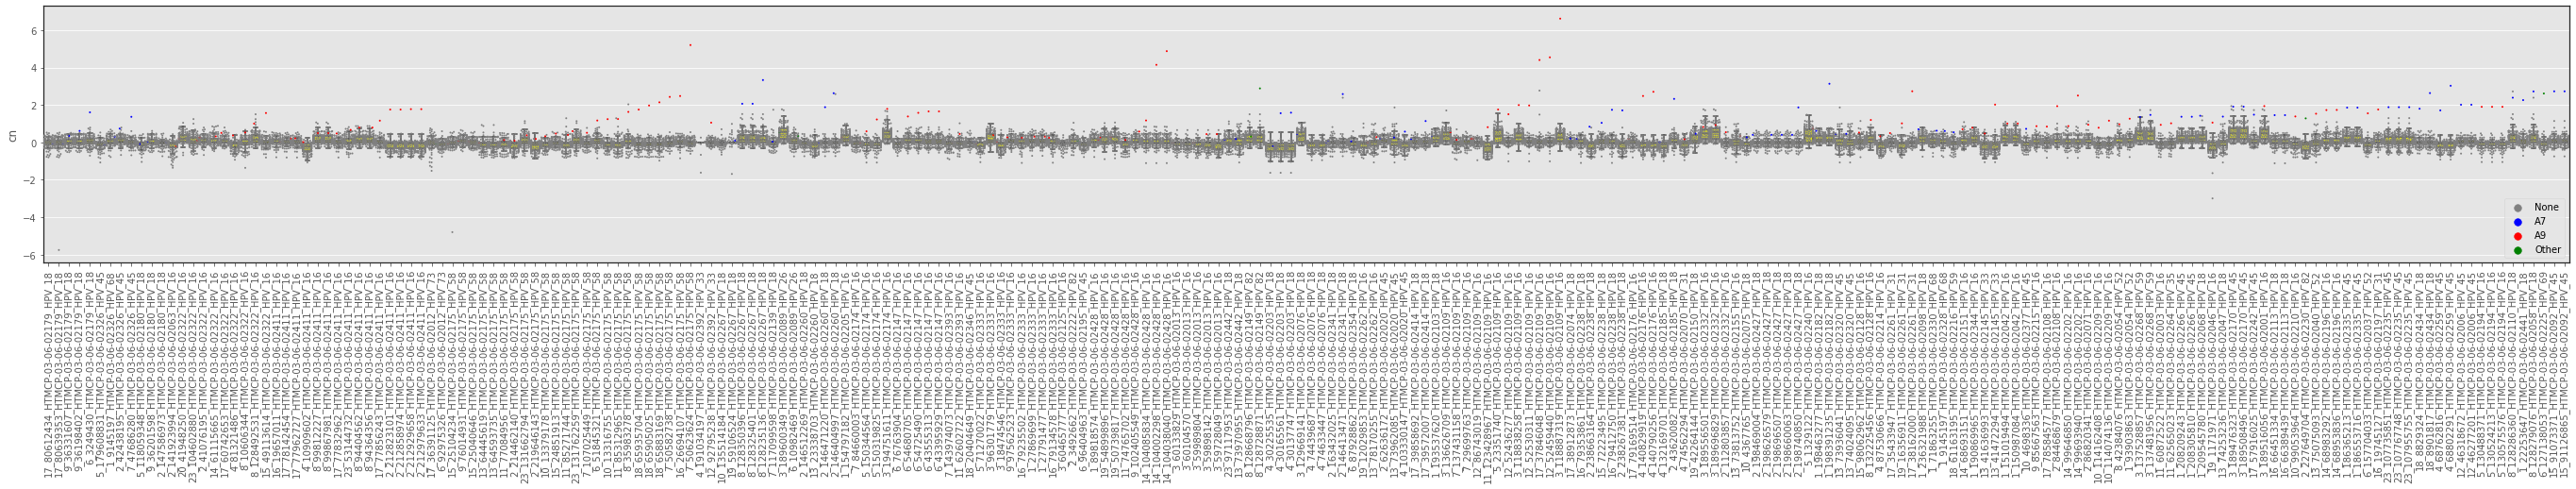

In [103]:
# dfr = dfp.iloc[:, -2:]
# dfr.head(2)
clrs =['yellow', 'gray',  'blue', 'red', 'green']
fig = plt.figure(figsize=(48, 5))
ax = fig.add_subplot(111)
# _ = ax.set_yscale('log')
sns.boxplot('events', 'cn',  data=dfrm, fliersize=0, color=clrs[0])
sns.swarmplot('events', 'cn',  data=dfrm, hue='HPV clade', palette = clrs[1:],
              size=2)
ax.legend(loc='lower right')
ax.set_xlabel('')
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/integration_events_copy_gain_20190717.png'
plt.savefig(of, dpi=300, bbox_inches='tight')

In [ ]:
int_values = []
for ix, row in dfp.iterrows():
    int_values.append(row[ix[1]])
dfp['integrated'] = int_values

In [ ]:
dfq = dfp.T.reset_index()
dfq.head(2)

In [ ]:
dfq.melt(id_vars=12, value_vars=dfq.columns)

In [ ]:
np.random.randint(1, 10, 500)

In [ ]:
print(idx)

In [ ]:
dfq = dfp.iloc[:, -2:]
dfq.head(2)
# dfq.plot()
# plt.set_xlabel(rotation=90)
f, ax = plt.subplots(figsize=(14, 7))
dfq.plot(marker='o', ax=ax, color=['red','blue'])
# _ = ax.set_title('arm level deletion: HIV+ vs. HIV-')
# _ = ax.set_ylabel('amplitude <-----> frequency')
# _ = ax.set_xticks(range(39))
# _ = ax.set_xticklabels(dfq.index)

In [ ]:
dfq

In [ ]:
dff = df[[0, 1, 2]].drop_duplicates()

In [ ]:
dff[[1]].duplicated().head(2)

In [ ]:
events = df[1].unique()
events[:2]

In [ ]:
for event in events:
    df2 = df[df[1]==event]
    df2 = pd.pivot_table(df2, index=6, values=11, columns=12)
    pats = df2.index
    for pat in pats:
        avg = df2.loc[pat, :].mean()
        cn = df2.loc[pat, pat]
        print(pat, avg, cn)

### look into how many patients with HPV integration

In [28]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/118_patients_integration_details_merged_comparison_to_review_apv_removed_20190729_excel.xls'
df1 = pd.read_excel(f)
df1.head()
df1.shape

,patient,virus,comments,integration_status,107_results,101_results,integration_detected,source,DNA_Integration,DNA_human-breakpoint,DNA_human-gene(s),library,RNA_Integration,RNA_human-breakpoint,RNA_human-gene(s)
0,HTMCP-03-06-02001,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_124,na,na,na,A37700,YES,3_189542968;3_189542598;3_189542597;3_18952631...,TP63
1,HTMCP-03-06-02002,HPV_52,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_125,na,na,na,A37701,YES,22_43168251;22_43165135;22_43163674;22_4316152...,intergenic
2,HTMCP-03-06-02003,HPV_16,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_126,NO,-,-,A37702,YES,11_60935033;11_60882522,intergenic;CD5
3,HTMCP-03-06-02006,HPV_18,hpv18_false_positive,not_detected,not_detected,not_detected,NOT_INTEGRATED,HTMCP_129,na,na,na,A37704,NO,-,-
4,HTMCP-03-06-02006,HPV_45,NaN,integrated,integrated,integrated,RNA_INTEGRATED,HTMCP_129,na,na,na,A37704,YES,12_46339702;12_46337036;12_46337035;12_4632994...,SCAF11;SCAF11;SCAF11;SCAF11;SCAF11;ARID2


(179, 15)

In [5]:
df1 = df1[df1.integration_status == 'integrated']
df1.shape

(113, 15)

In [8]:
df1.query('patient == "HTMCP-03-06-02001"')['RNA_human-breakpoint'][0]

'3_189542968;3_189542598;3_189542597;3_189526317;3_189526315;3_189526059;3_189526056'

In [13]:
df1.query('patient == "HTMCP-03-06-02002"')['RNA_human-breakpoint'][1]


'22_43168251;22_43165135;22_43163674;22_43161526;22_43161525'

In [25]:
pat1 = df1.patient.unique()

In [31]:
df1[df1.integration_status=='not_detected']

,patient,virus,comments,integration_status,107_results,101_results,integration_detected,source,DNA_Integration,DNA_human-breakpoint,DNA_human-gene(s),library,RNA_Integration,RNA_human-breakpoint,RNA_human-gene(s)
3,HTMCP-03-06-02006,HPV_18,hpv18_false_positive,not_detected,not_detected,not_detected,NOT_INTEGRATED,HTMCP_129,na,na,na,A37704,NO,-,-
13,HTMCP-03-06-02020,HPV_18,hpv18_false_positive,not_detected,not_detected,not_detected,NOT_INTEGRATED,HTMCP_137,na,na,na,A37710,NO,-,-
27,HTMCP-03-06-02068,HPV_59,false_positive,not_detected,not_detected,not_detected,RNA_INTEGRATED,HTMCP_159,na,na,na,A37726,YES,1_209560518,intergenic
37,HTMCP-03-06-02092,HPV_18,hpv18_false_positive,not_detected,not_detected,not_detected,NOT_INTEGRATED,HTMCP_172,na,na,na,A37735,NO,-,-
43,HTMCP-03-06-02098,HPV_9,false_positive,not_detected,not_detected,not_detected,DNA_INTEGRATED,HTMCP_174,YES,2_137648071,THSD7B,A37737,na,na,na
51,HTMCP-03-06-02110,HPV_45,false_positive,not_detected,not_detected,not_detected,DNA_INTEGRATED,HTMCP_235,YES,8_128302005,"DQ515899,DQ515898,LOC727677",A50339,na,na,na
61,HTMCP-03-06-02145,HPV_9,NaN,not_detected,not_detected,not_detected,DNA_INTEGRATED,HTMCP_249,YES,18_28136581,intergenic,A50345,na,na,na
76,HTMCP-03-06-02170,HPV_18,hpv18_false_positive,not_detected,not_detected,not_detected,NOT_INTEGRATED,HTMCP_284,na,na,na,A54471,NO,-,-
82,HTMCP-03-06-02176,HPV_58,false_positive,not_detected,not_detected,not_detected,BOTH_INTEGRATED,HTMCP_288,YES,4_140811717,MAML3,A52351,YES,4_140811717,MAML3
85,HTMCP-03-06-02179,HPV_97,low_reads,not_detected,not_detected,not_detected,DNA_INTEGRATED,HTMCP_290,YES,6_3289268,"SLC22A23,CFB,TNXB,C4B_2,C2,HSPA1L",A54473,na,na,na


In [3]:

f = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/hpv_integration_events_060819.bed'
df = pd.read_csv(f, sep='\t')
df.head()
df.shape

,chr,start,end,event,sample,length,closest.gene,tss.dist,num.of.sites,HPV.type,Clade
0,3,189526055,189542969,HTMCP-03-06-02001.HPV_16.3_189526055,HTMCP.03.06.02001,16914,MIR944,4741,7,HPV16,A9
1,22,43161524,43168252,HTMCP-03-06-02002.HPV_52.22_43161524,HTMCP.03.06.02002,6728,A4GALT,44648,5,HPV52,A9
2,11,60882521,60935034,HTMCP-03-06-02003.HPV_16.11_60882521,HTMCP.03.06.02003,52513,VPS37C,0,2,HPV16,A9
3,12,46287200,46339703,HTMCP-03-06-02006.HPV_45.12_46287200,HTMCP.03.06.02006,52503,SCAF11,44698,6,HPV45,A7
4,9,115288280,115288280,HTMCP-03-06-02008.HPV_9.9_115288280,HTMCP.03.06.02008,0,KIAA1958,39032,1,HPV9,Other


(257, 11)

In [22]:
a = df.event.str.split('.')
df['patient'] = [i[0] for i in a]

In [24]:
pat = df.patient.unique()

In [26]:
set(pat1) - set(pat)

{'HTMCP-03-06-02120'}